# Lecture 4 Python Practice (Decision Trees)

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import mglearn

import warnings
warnings.filterwarnings("ignore")

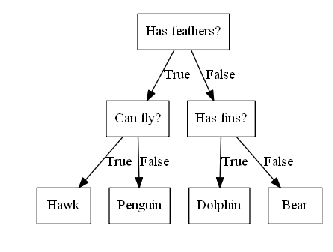

In [2]:
mglearn.plots.plot_animal_tree()

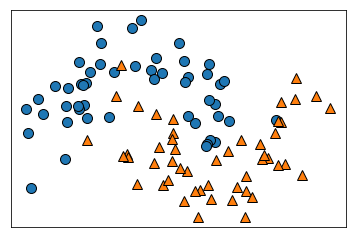

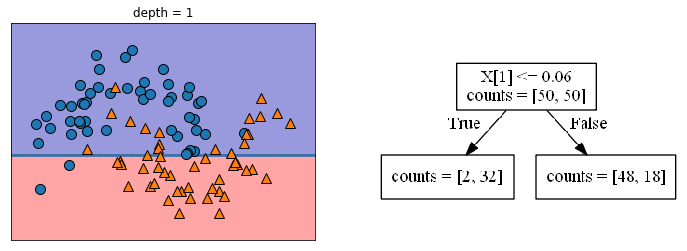

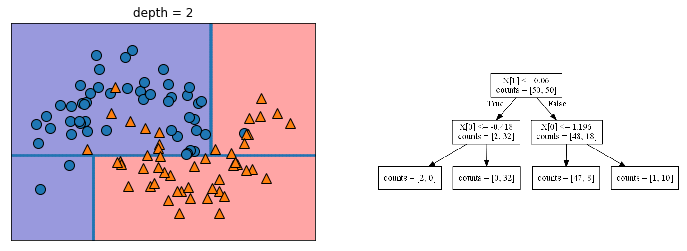

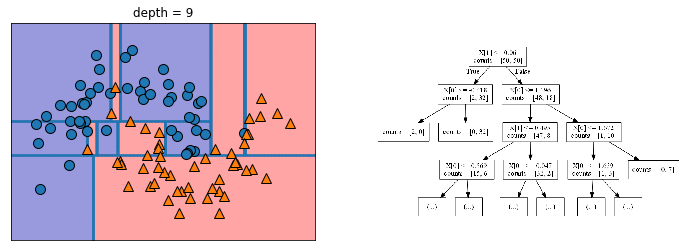

In [3]:
mglearn.plots.plot_tree_progressive()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)

# criterion: the function to measure the quality of a split. Default: "gini". change to "entropy"
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node
# max_leaf_nodes

tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
# try to train a decision tree where the maximum depth is 4


In [6]:
# find the optimal tree



In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

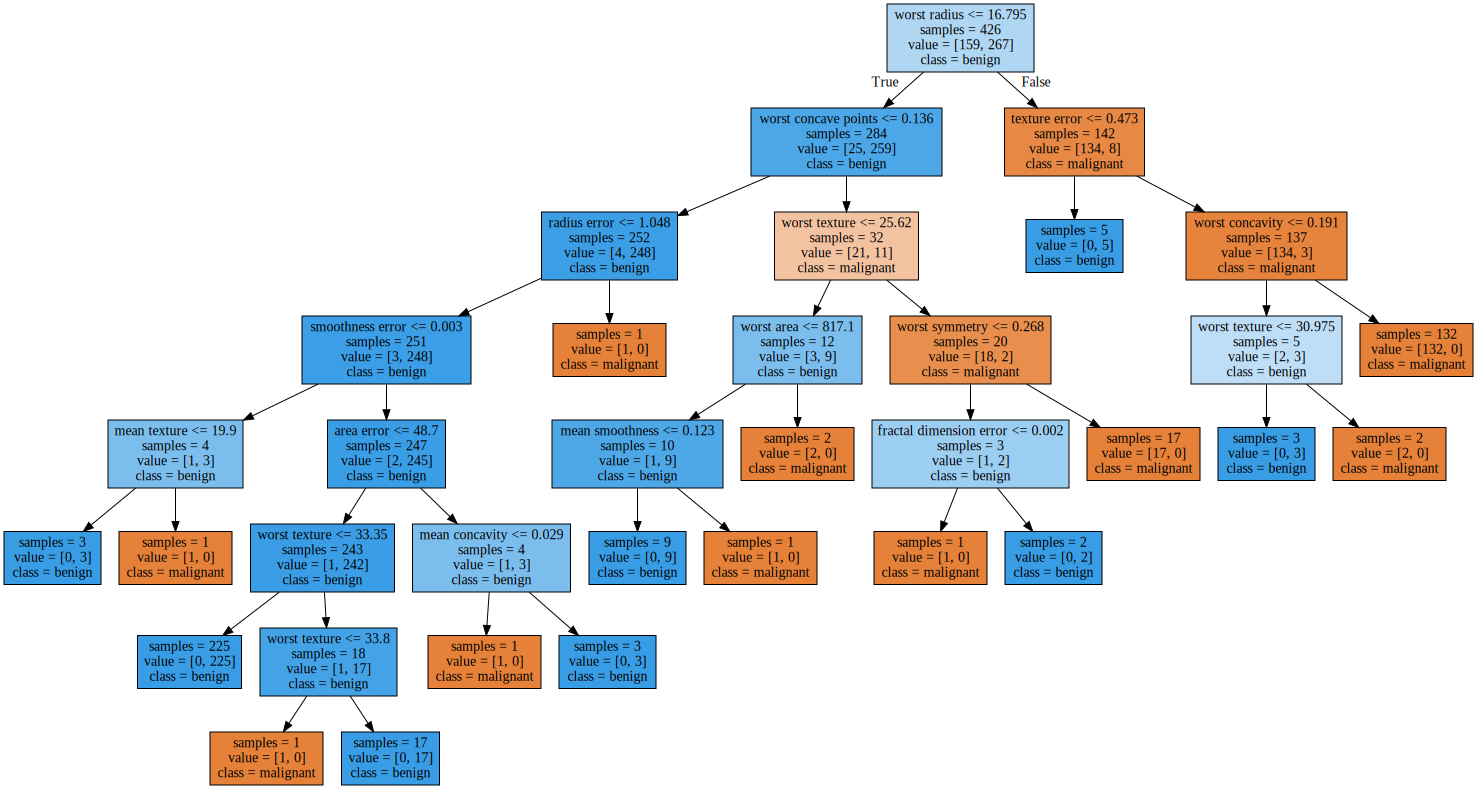

In [8]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [9]:
print("Feature importances:")
print(tree.feature_importances_)

# The importance of a feature is computed as the (normalized) 
# total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


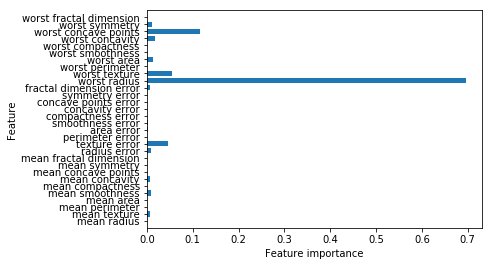

In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [11]:
# load the data set
# load_iris() loads and returns the iris dataset (classification).
iris = load_iris()
# load_iris() returns a dictionary-like object. The interesting attributes are: 
# ‘data’, the data to learn, 
# ‘target’, the classification labels, 
# ‘target_names’, the meaning of the labels, 
# ‘feature_names’, the meaning of the features, and 
# ‘DESCR’, the full description of the dataset.

# Wikipedia entry for this data set: https://en.wikipedia.org/wiki/Iris_flower_data_set

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
## Explore the data set
n_samples, n_features = iris.data.shape
#print(iris.keys())
print('The dimensions of the data set are', n_samples, 'by', n_features)
# It is made of 150 observations of irises, each described by 4 features: their sepal and petal length and width, as detailed in iris.DESCR.

#print(iris.data.shape)
#print(iris.target.shape)
print('The classes are:', iris.target_names)
print('The features in the data set are:', iris.feature_names)

# This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored
# in a 150x4 numpy.ndarray
# The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The dimensions of the data set are 150 by 4
The classes are: ['setosa' 'versicolor' 'virginica']
The features in the data set are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


([], <a list of 0 Text yticklabel objects>)

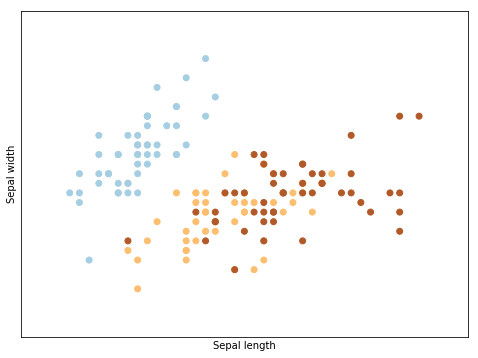

In [13]:
## Visualization of the data set
from mpl_toolkits.mplot3d import Axes3D

X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [14]:
X = iris.data[:, 2:] # petal length and width
y = iris.target


# train a decision tree



In [15]:
# Plot your tree

In [16]:
# command-line:
# dot -T png iris_tree.dot -o iris_tree.png
# the above line converts the .dot file to a .png image file